In [4]:
import random
random.seed(0)

import numpy as np
random.seed(0)

import tensorflow as tf
random.seed(0)

In [5]:
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

In [6]:
dataset = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [8]:
len(train_images), len(test_images)

(60000, 10000)

In [9]:
train_images[0].shape

(28, 28)

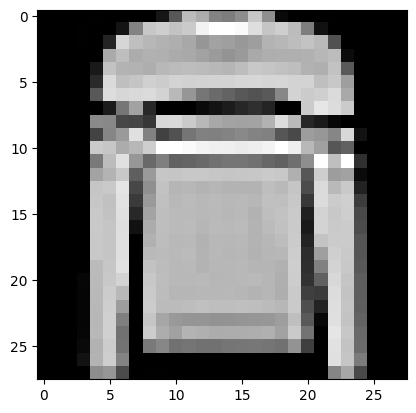

In [10]:
plt.imshow(train_images[5], cmap='gray')
plt.show()

In [11]:
print(train_labels[5])

2


In [12]:
train_images_scaled, test_images_scaled = train_images/255.0, test_images/255.0

In [13]:
train_images_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
train_images_reshaped = train_images_scaled.reshape((train_images.shape[0], 28, 28, 1))
test_images_reshaped = test_images_scaled.reshape((test_images.shape[0], 28, 28, 1))

In [15]:
train_images_reshaped.shape, test_images_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [18]:
history = model.fit(train_images_reshaped, train_labels, epochs = 5,
                    validation_data = (test_images_reshaped, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7436 - loss: 0.6977 - val_accuracy: 0.8560 - val_loss: 0.3714
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8804 - loss: 0.3289 - val_accuracy: 0.8829 - val_loss: 0.3269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8968 - loss: 0.2744 - val_accuracy: 0.8902 - val_loss: 0.3037
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9084 - loss: 0.2431 - val_accuracy: 0.9021 - val_loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9202 - loss: 0.2146 - val_accuracy: 0.9032 - val_loss: 0.2730


In [22]:
test_loss, test_acc = model.evaluate(test_images_reshaped, test_labels, verbose = 2)
print('Test acc is :', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9032 - loss: 0.2730
Test acc is : 0.9031999707221985


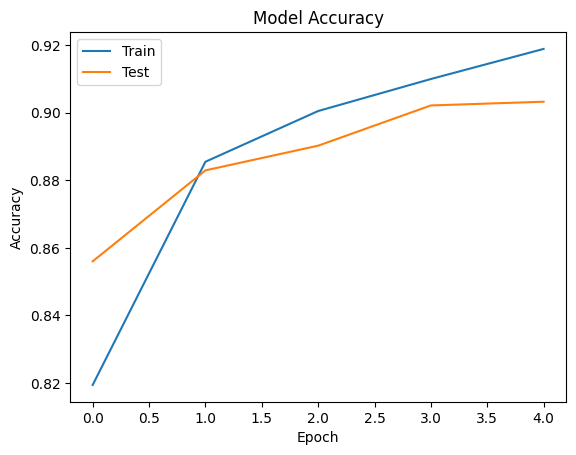

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

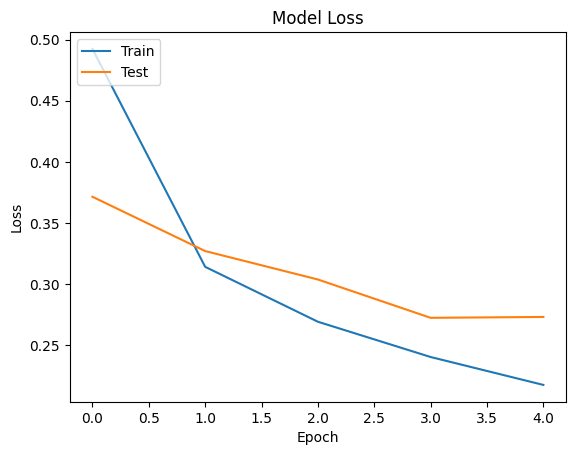

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [28]:
model.save('trained_fashion_MNIST_model.h5')